# <b># PA 1: Exploratory Analysis over Artists Dataset</b>

## Student Details

Student1 Name and ID: Pooja Gaurav 1001415194
Student2 Name and ID: Neha Piraji Mali 1001733478

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Artists dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work Artists dataset. Specifically, you will work on artists.csv file from kaggle repository (https://www.kaggle.com/revilrosa/music-label-dataset?select=artists.csv). The file artists.csv contains 50,000 rows and 9 columns. Each row corresponds to an artwork created by an artist/rapper/singer etc. who are located all around the US. The columns of the data-set are:
- id - Unique number for each artwork declared
- real_name - Name of the artist
- art_name - Name of the art work
- role - Role of the artist
- year_of_birth - The year artist is born in
- country - place of the artist 
- city - city of the artist 
- email - artist's email
- zip_code - Zip code of their place



## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

<b># Reading Dataset</b>

The Python code below reads the Artists dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'artists.csv' must be in the same folder as this file.

In [4]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('artists.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,id,real_name,art_name,role,year_of_birth,country,city,email,zip_code
0,1,Kameko Nelson,NaN,female voice,1981,Slovenia,Vedrin,lorem.tristique.aliquet@nonummyFusce.co.uk,6914
1,2,Sacha Cameron,Bianco Ibureno Chloride,artist,1955,Guernsey,Montigny-le-Tilleul,Sed@elementum.com,0568
2,3,Thane E. Oliver,NaN,rapper,1993,Guinea-Bissau,Saint-SÃ©bastien-sur-Loire,Integer.tincidunt.aliquam@libero.com,813154
3,4,Cole E. Joseph,Persian responsible,bassist,1994,Estonia,Newquay,nulla.magna.malesuada@vulputate.com,A4S 2B3
4,5,Sonia U. Jensen,Asleep lonely Big Morgan,DJ,1988,Vanuatu,Dudzele,faucibus@euismodetcommodo.edu,46418


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [5]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n", df_data.info(verbose=True, buf=None, max_cols=9, memory_usage=True, null_counts=True) ) 

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = len(df_data)
num_cols = len(df_data.columns)
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Year of Birth' column of the df_data 

print ("\n\n>>Task 1-c: Descriptive details of 'Year of Birth' column are\n",df_data['year_of_birth'].astype(object).describe())

# 10 points
#Task 1-d: Print ALL the unique values of role and Countries  .
role_list  = df_data.role.unique()
unique_country_list = df_data.country.unique()

print ("\n\n >>Task 1-d:")
print(role_list)
print("#####################################################")
print(unique_country_list) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50000 non-null  int64 
 1   real_name      50000 non-null  object
 2   art_name       33291 non-null  object
 3   role           50000 non-null  object
 4   year_of_birth  50000 non-null  int64 
 5   country        50000 non-null  object
 6   city           50000 non-null  object
 7   email          50000 non-null  object
 8   zip_code       50000 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.4+ MB
>>Task 1-a: Details of df_data data frame are: 
 None


>>Task 1-b: Number of rows:50000 and number of columns:9


>>Task 1-c: Descriptive details of 'Year of Birth' column are
 count     50000
unique       46
top        1966
freq       1162
Name: year_of_birth, dtype: int64


 >>Task 1-d:
['female voice' 'artist' 'rapper' 'bassist' 'DJ' 'violinist' 'band member'
 'p

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [6]:
# 8 points
#Task 2-a: Print the details of pianists and violinists from Brazil 

artists_from_brazil = df_data[((df_data["role"]=="violinist") | (df_data["role"]=='pianist')) & (df_data["country"]=='Brazil')]
print (">>Task 2-a: The details of 'pianist' and 'violinist' from Brazil are %s" 
      % (artists_from_brazil))

# 8 points
#Task 2-b: Find out the total number of arts made by artists born between 1958 and 1972.

arts_made_1958_1972 = len(df_data[(df_data['year_of_birth'] >= 1958) & (df_data['year_of_birth'] <= 1972) & (df_data['role'] == 'artist')])
print ("\n\n>>Task 2-b: The total number of arts made by artists from 1958-1972 were %s" 
       % (arts_made_1958_1972))

# 14 points
#Task 2-c: Find out the top 5 countries with roles 'artist' and 'guitarist'.
n = 5
artist_country = df_data[(df_data["role"]=="artist")].groupby(['country']).count()
sortartist= artist_country.sort_values(by='role', ascending=False).head(5)

guitarist_country = df_data[(df_data["role"]=="guitarist")].groupby(['country']).count()
sortguitarist= guitarist_country.sort_values(by='role', ascending=False).head(5)

top5_artist = sortartist[['role']]
top5_guitarist=sortguitarist[['role']]
print ("\n\n>>Task 2-c: top 5 countries with artists: \n%s" % (top5_artist))
print ("\n\n>>Task 2-c: top 5 counties with guitarists: \n%s" % (top5_guitarist))




>>Task 2-a: The details of 'pianist' and 'violinist' from Brazil are           id             real_name                           art_name  \
1255    1256        Ulla J. Guzman                                NaN   
5264    5265       Quintessa Weeks                 Strong Friday Clam   
6645    6646     Mohammad W. Gould                            Manager   
6676    6677          Jonah Chavez  Destinee Slovakia Emon Firewalker   
7312    7313       Timothy E. Park                                NaN   
9912    9913      Herman W. Fisher           Loestrin 24 Kierra Indas   
10005  10006      Christine Cannon                                NaN   
10499  10500    Griffith W. Steele             Carly Wildface Maximus   
10708  10709         Hamish Baxter                                NaN   
10777  10778    Iliana N. Shepherd                                NaN   
11054  11055      Larissa X. Ayers                            Harriea   
17589  17590        Shafira Jordan                     

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

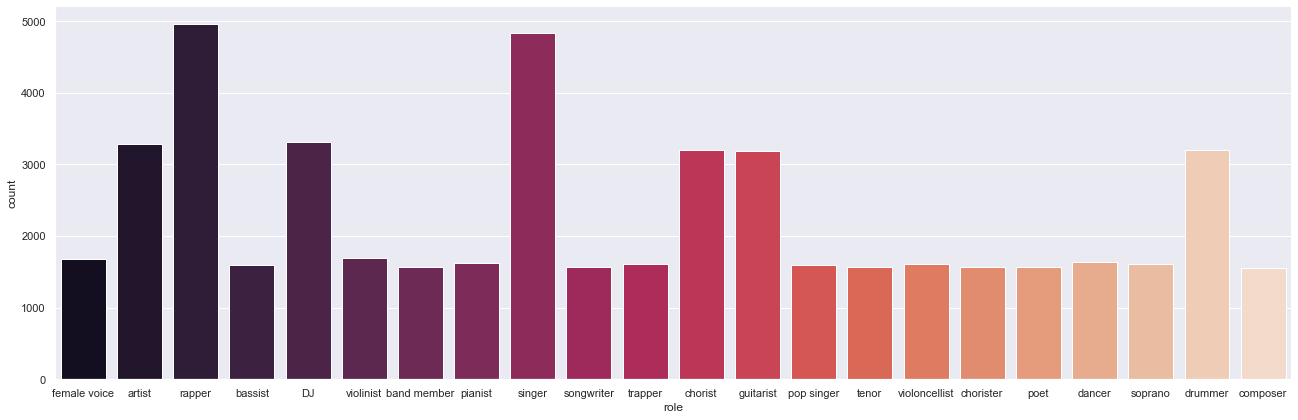

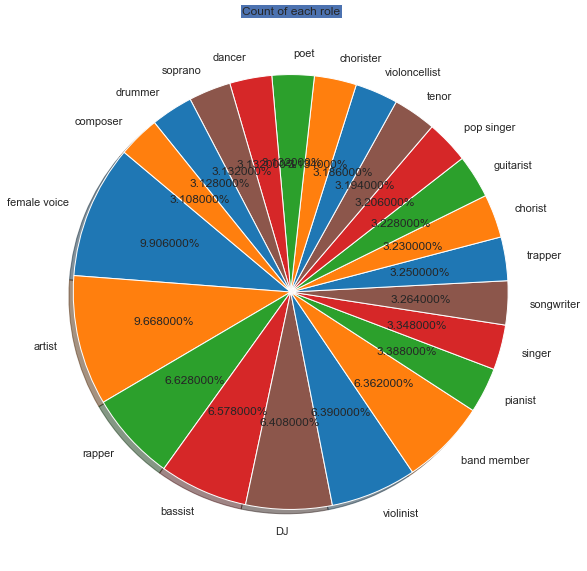

In [55]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the count for each role . 
# Think of a way to nicely visualize all the roles! 
#########################begin code for Task 3-a
sns.set(style='darkgrid')
sns.catplot(x='role', kind="count",data=df_data, palette="rocket", height=6, aspect=3)
plt.show()

#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents each role.
#########################begin code for Task 3-b 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
role = df_data.role.unique()
count = df_data['role'].value_counts()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(count, labels=role, colors=colors, autopct='%1f%%', shadow=True, startangle=140)
plt.title("Count of each role", bbox={'pad':2})
plt.show()


#########################end code for Task 3-b

#References
# https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-4.php
# https://seaborn.pydata.org/tutorial/categorical.html

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

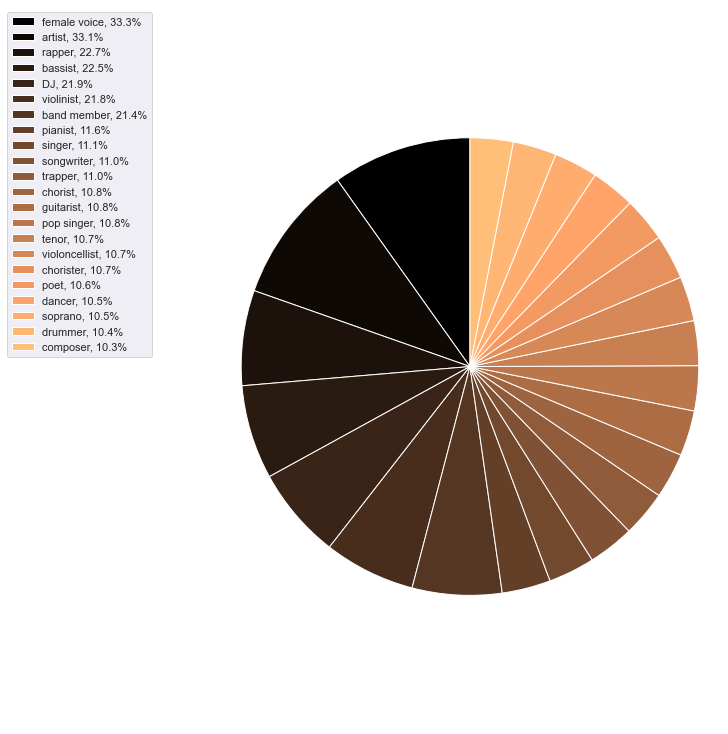

In [56]:
#########################begin code for Task 4

# Our plot shows from year 1995 to 2000, which art form and roles were most popular
# We filtered the dataset on the basis of year of birth and got the total count of artist born in that 
#  period  and plotted it in our graph


data = df_data[(df_data['year_of_birth'] >= 1970) & (df_data['year_of_birth'] <= 2000)][['art_name','role','country','year_of_birth' ]]

role = df_data.role.unique()
count = data['role'].value_counts()
labels = ["%s" %i for i in role]
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(count))
                             for i in range(len(count))])
patches, texts= ax1.pie(count,startangle=90, radius=1800)
ax1.axis('equal') 
plt.legend(loc='upper left', labels=['%s, %1.1f%%' % (l, (float(pd.to_numeric(s)) / 100))
            for l, s in zip(labels, count)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.show()

#References:
# https://www.pythonprogramming.in/how-to-pie-chart-with-different-color-themes-in-matplotlib.html

#########################end code for Task 4

## Observations
<p>The trend of each declaration with time will give the information about the rate at with each declaration got changed in the given period (1953 - 2017)</p>

<p>The trend of Disasters from 1953 to 2017 has rapidly increased and recorded highest in the year 2017 and according to the trend we predict that it can further increase in the future.</p>

<p>The trend of Emergency has increased gradually for last 63 years</p> 

<p>The trend of Fire decreased at a slow pace. The Count of fires recorded least in the year 2012</p>

# Task 5:

Use Weka to 
1) Find out how to convert the used dataset in weka format 
2) Convert it 
3) use the weka visualizer to produce some graphs.

In [ ]:
# 20 point
#########################begin code for Task 5

# We converted CSV file to Arff format by adding some tags acceoted by Weka Tool

#The label of our dataset are: id, real_name, art_name, role
# Step1: We add this tag first - @relation artist
#Step2: We specify all our labelos with this tage- @attribute numeric/nominal
#Step3: We add this tag over the values- @data
#Save the file
#Once this file is uploaded to Weka, we get following graphs

# Visulaizated data is as follows:
# TO UPLOAD IMAGE, COMMAND USED : ![](image.png)


![](art_city.png)

## X -axis : ID
## Y-axis : Real Name

![](id_realname.png)

## X -axis : Real Name
## Y-axis : Role
![](name_role.png)

## X -axis : Art form
## Y-axis : Email 
![](art_email.png)

In [12]:
#########################end code for Task 5